11
17
26
38
56
11
17
26
38
56
87
132
186
287
449
11
17
26
38
56
87
132
186
287
449
701
1018
1488
2391
3625
11
17
26
38
56
87
132
186
287
449
701
1018
1488
2391
3625
5374
8180
12419
19035
28796
11
17
26
38
56
87
132
186
287
449
701
1018
1488
2391
3625
5374
8180
12419
19035
28796
43674
66647
100083
152998
233875
11
17
26
38
56
87
132
186
287
449
701
1018
1488
2391
3625
5374
8180
12419
19035
28796
43674
66647
100083
152998
233875
352515
536112
813220
1238886
1883724


Text(0, 0.5, 'time in seconds')

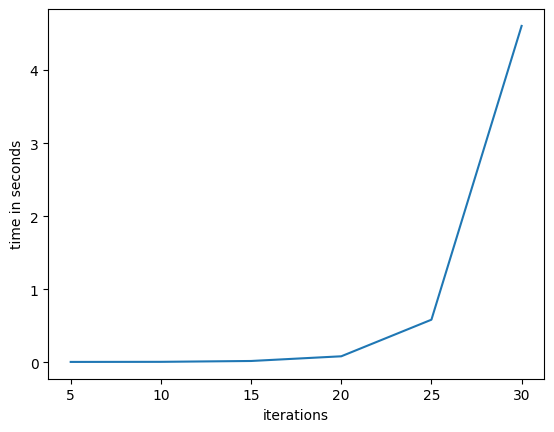

In [ ]:
from concurrent.futures import ThreadPoolExecutor
import numpy as np

def blink(n: int) -> list[int]:
    if n == 0:
        return [1]
    elif int(np.log10(n)) % 2 != 0:
        no_digits = int(np.log10(n))+1
        left = n // 10 ** (no_digits / 2)
        right = n % 10 ** (no_digits / 2)
        return [int(left), int(right)]
    else:
        return [n * 2024]

def process_slice(slice):
    return [item for sublist in map(blink, slice) for item in sublist]

def parallel_process(array, num_threads):
    slice_size = (len(array) + num_threads - 1) // num_threads 
    slices = [array[i:i + slice_size] for i in range(0, len(array), slice_size)]

    results = []
    with ThreadPoolExecutor(max_workers=num_threads) as executor:
        futures = [executor.submit(process_slice, slice) for slice in slices]
        for future in futures:
            results.extend(future.result())

    return results

nums = []
with open('input.txt') as f:
    nums = [int(x) for x in f.readline().strip().split(" ")]

import time
import matplotlib.pyplot as plt
times_x_inputs = []
num_threads = 10

def measure(n, nums):
    start = time.time()
    for _ in range(n):
        nums = parallel_process(nums, num_threads)

    return (time.time()-start, len(nums))

start, end, step = 5, 35, 5

for i in range(start, end, step):
    t, _ = measure(i, nums)
    times_x_inputs.append(t)

plt.plot(range(start, end, step), times_x_inputs)
plt.xlabel('iterations')
plt.ylabel('time in seconds')
# exponential growth in time... not good


In [ ]:
measure(75, nums)

11
17
26
38
56
87
132
186
287
449
701
1018
1488
2391
3625
5374
8180
12419
19035
28796
43674
66647
100083
152998
233875
352515
536112
813220
1238886
1883724
2847186
4341731
6587981
9991892
15217750
23067831
35066899
53252251
80827859
123008548
186512855
